# STAT479 Homework 2

We will build a binary classifier using the Breast Cancer Wisconsin (Diagnostic) Dataset from the UCI Machine Learning Repository, a widely used dataset for binary classification tasks. In this assignment, you will build, train, and evaluate a feedforward neural network (FNN) for predicting whether a tumor is malignant or benign.

### a. Use the load_breast_cancer() function from sklearn.datasets to load the breast cancer dataset.

• What is the shape of the data (number of samples and features)?

In [17]:
from sklearn.datasets import load_breast_cancer

# loading the breast cancer dataset
data = load_breast_cancer()
data_shape = data.data.shape

# displaying shape of data [samples x features]
print("Shape of the breast cancer data:", data_shape)

Shape of the breast cancer data: (569, 30)


### b. Convert the dataset into a pandas DataFrame using the pd.DataFrame() function. Make sure to specify columns= to display the feature names.

• What is the mean concavity for observation #564?

In [18]:
import pandas as pd

# converting into pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
# finding the mean concavity for observation #564
obs_564 = df.loc[563, 'mean concavity'] # 0-based index
obs_564

# The mean concavity for observation #564 is 0.3174.

0.3174

### c. Split the data into three sets: training, validation, and test sets. Use an 80-10-10 split. Use train_test_split() with the test_size parameter to first split the data into 80% training and 20% temporary data. Then split the temporary data again into 50% validation and 50% test data.
• What are the shapes of three datasets?

In [20]:
from sklearn.model_selection import train_test_split
X, y = df.drop(columns='target'), df['target']

# split into 80% training and 20% temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# split the 20% temporary data into 50% validation and 50% test data --> 10 validation and 10 test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Output the shapes of the datasets
train_shape = X_train.shape
val_shape = X_val.shape
test_shape = X_test.shape

print(train_shape, val_shape, test_shape)
# training set: 455 x 30
# validation set: 57 x 30
# test set: 57 x 30

(455, 30) (57, 30) (57, 30)


### d. Standardize the training, validation, and test datasets using StandardScaler() from sklearn.preprocessing. Fit the scaler on the training data and transform the training dataset using .fit_transform(). Apply .transform() to both validation and test dataset using the same scaler fitted on the training data.

In [21]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fitting scaler on the training data and transforming the training dataset
X_train = scaler.fit_transform(X_train)

# applying .transform() to both validation and test dataset
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### e. Create a feedforward neural network (FNN) using tensorflow.keras (or keras):
The network should include one hidden layer with 16 neurons and ReLU activation and an output layer with 1 neuron and Sigmoid activation for binary classification.

In [22]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

# build the model using tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(30,)), # input layer with 30 features
    tf.keras.layers.Dense(16, activation='relu'), # first hidden layer with 16 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer with 1 node for classification. Sigmoid activation for binary classification
])

### f. Compile the model using binary_crossentropy loss function, Adam optimizer. Track accuracy during training.

In [23]:
from keras import optimizers

model.compile(optimizer = 'adam', # adaptive moment estimation
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### g. Train the model for 100 epochs, but include the validation data during training by passing the validation_data argument to model.fit(). Use the training data for training and validation data for monitoring overfitting. Record the loss and accuracy for both training and validation data at each epoch.
• What is the validation accuracy after 100 epochs?

In [24]:
# training the model for 100 epochs
r = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5592 - loss: 0.7031 - val_accuracy: 0.6842 - val_loss: 0.5235
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7600 - loss: 0.5430 - val_accuracy: 0.7544 - val_loss: 0.4047
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8500 - loss: 0.4548 - val_accuracy: 0.8947 - val_loss: 0.3286
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8847 - loss: 0.3655 - val_accuracy: 0.9123 - val_loss: 0.2784
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9036 - loss: 0.3007 - val_accuracy: 0.9474 - val_loss: 0.2405
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9268 - loss: 0.2483 - val_accuracy: 0.9474 - val_loss: 0.2126
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9366 - loss: 0.2102 - val_accuracy: 0.9474 - val_loss: 0.1911
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9168 - loss: 0.2203 - val_accuracy: 0.9474 - 

### h. After training, plot the training loss and validation loss over the 100 epochs. Use this plot to visually determine the point at which the model begins to overfit (i.e., when validation loss stops decreasing and starts to increase).
• Based on this plot, determine the optimal number of epochs for training.

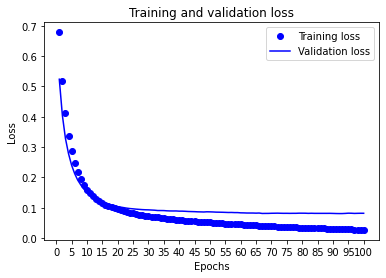

In [25]:
# plot of training loss and validation loss history
import matplotlib.pyplot as plt

history_dict = r.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' means blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b' means solid blue line

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Setting the x-ticks to integers and adding breaks at every 5 epochs
plt.xticks(range(0, len(loss_values) + 1, 5))  # Adjust the step size to 5

plt.show()

30 epochs seem to be an optimal number of epochs for training, training beyond this point does not seem to improve validation loss and may even lead to overfitting.

### i. According to (h), rebuild your FNN.

In [26]:
# rebuilding the FNN model for 30 epochs
r2 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9947 - loss: 0.0240 - val_accuracy: 0.9649 - val_loss: 0.0819
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9907 - loss: 0.0285 - val_accuracy: 0.9649 - val_loss: 0.0818
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9939 - loss: 0.0229 - val_accuracy: 0.9649 - val_loss: 0.0825
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9954 - loss: 0.0251 - val_accuracy: 0.9649 - val_loss: 0.0828
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9649 - val_loss: 0.0833
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9950 - loss: 0.0221 - val_accuracy: 0.9649 - val_loss: 0.0832
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9889 - loss: 0.0322 - val_accuracy: 0.9649 - val_loss: 0.0828
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9913 - loss: 0.0246 - val_accuracy: 0.9649 - val_loss:

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.5f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9779 - loss: 0.0488
Test accuracy: 0.98246


This high test accuracy suggests that the model generalizes well to unseen data.